# Predicting Bankruptcy

Dataset: Taiwan Economic Journal for years 1999 to 2009

## Reading the dataset

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Bankruptcy.csv')
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


## EDA and Feature Engineering

In [3]:
# Check for null values

df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [4]:
# Check for duplicates

df.duplicated().sum()

0

The dataset has neither null nor duplicate values

In [5]:
# Check for data types for each column

df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [6]:
# Check for columns with data types other than int64 or float64

non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64']).columns

if len(non_numeric_columns) > 0:
    print(f"The following columns have non-numeric data types: {', '.join(non_numeric_columns)}")
else:
    print("All columns have numeric data types.")

All columns have numeric data types.


In [7]:
# Statistical summary of the dataset

df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [8]:
# Create a representative sample for quicker visualization

sample_df = df.sample(frac=0.1, random_state=42)

In [9]:
sample_df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,...,682.000000,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.0,682.000000
mean,0.043988,0.501421,0.553451,0.549812,0.607835,0.607841,0.998957,0.797381,0.809296,0.303536,...,0.804644,2.064516e+07,0.623489,0.607833,0.840613,0.280326,0.027350,0.565225,1.0,0.045944
std,0.205220,0.059798,0.066519,0.061824,0.012909,0.012901,0.001038,0.001341,0.001264,0.001075,...,0.042085,3.494840e+08,0.004889,0.012909,0.005914,0.007356,0.006111,0.015726,0.0,0.043503
min,0.000000,0.081412,0.091256,0.091761,0.540891,0.540891,0.973875,0.767759,0.781429,0.300275,...,0.412621,1.085313e-04,0.531839,0.540890,0.770996,0.199162,0.000789,0.198632,1.0,0.008500
25%,0.000000,0.476259,0.532817,0.527651,0.600055,0.600066,0.998963,0.797383,0.809309,0.303463,...,0.796206,9.365896e-04,0.623625,0.600055,0.840063,0.277011,0.026791,0.565158,1.0,0.023860
50%,0.000000,0.499391,0.555222,0.549012,0.605533,0.605511,0.999016,0.797447,0.809361,0.303526,...,0.808321,2.197547e-03,0.623873,0.605533,0.840996,0.278990,0.026811,0.565267,1.0,0.032665
75%,0.000000,0.532467,0.583815,0.579876,0.613884,0.613723,0.999079,0.797560,0.809450,0.303578,...,0.823363,5.229207e-03,0.624140,0.613882,0.842291,0.281762,0.026926,0.565800,1.0,0.051544
max,1.000000,0.691756,0.777747,0.761283,0.665151,0.665151,0.999612,0.809513,0.821053,0.329207,...,0.913070,7.790000e+09,0.643695,0.665149,0.916329,0.349303,0.174091,0.666761,1.0,0.477339


In [7]:
# Correlation matrix

df_corr = df.corr()

# Get the correlation of each feature with the target variable 'Bankrupt?'
target_corr = df_corr['Bankrupt?'].abs().sort_values(ascending=False)

# Display the top 10 features most correlated with the target variable
target_corr.head(11)

Bankrupt?                                                   1.000000
 Net Income to Total Assets                                 0.315457
 ROA(A) before interest and % after tax                     0.282941
 ROA(B) before interest and depreciation after tax          0.273051
 ROA(C) before interest and depreciation before interest    0.260807
 Net worth/Assets                                           0.250161
 Debt ratio %                                               0.250161
 Persistent EPS in the Last Four Seasons                    0.219560
 Retained Earnings to Total Assets                          0.217779
 Net profit before tax/Paid-in capital                      0.207857
 Per Share Net profit before tax (Yuan ¥)                   0.201395
Name: Bankrupt?, dtype: float64

This correlation matrix was able to determine top 10 features that have the strongest relation to the target variable.

In [8]:
key_features = target_corr.head(11).index.drop('Bankrupt?')

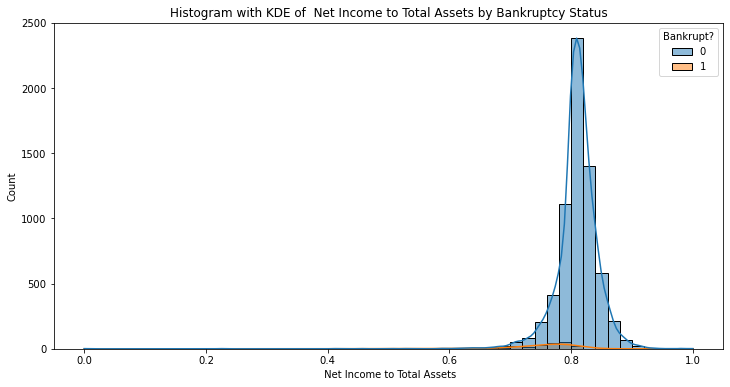

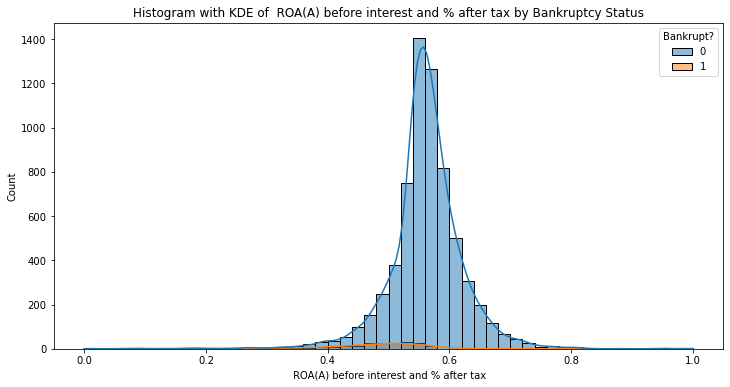

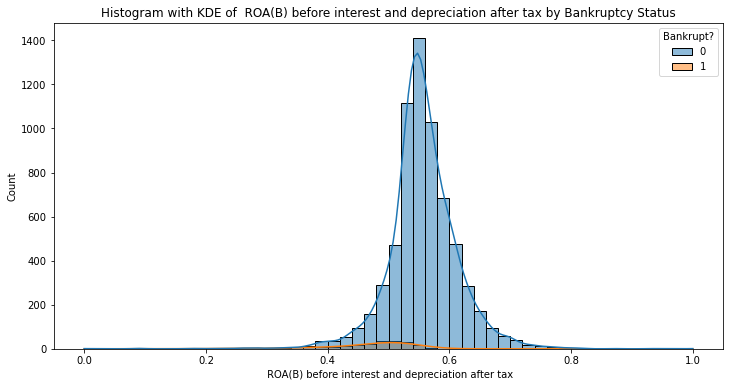

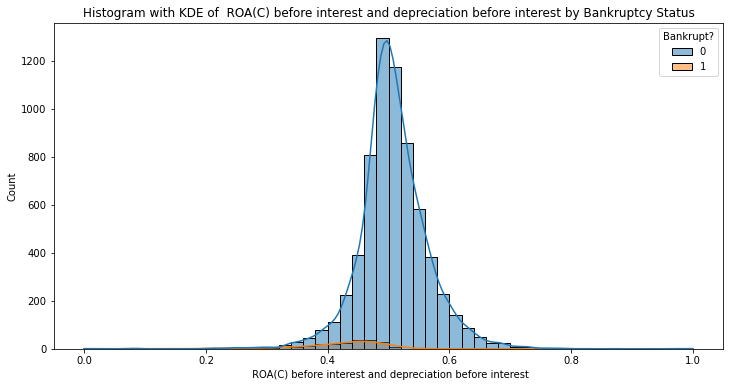

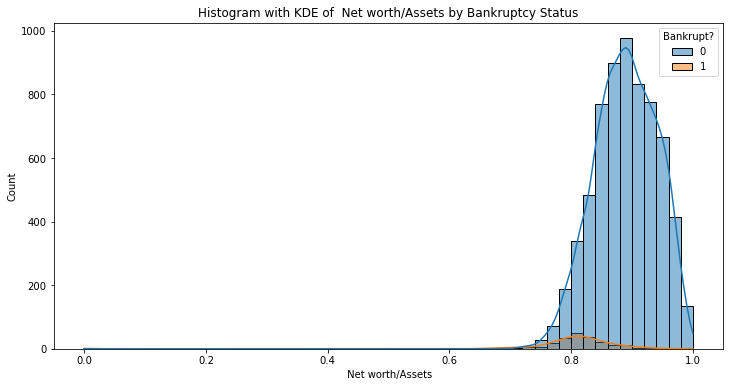

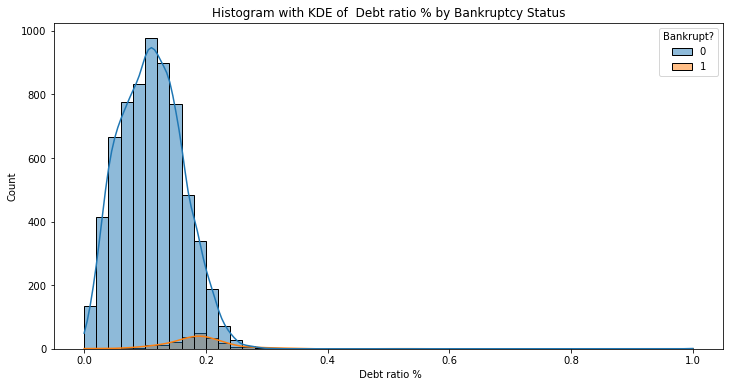

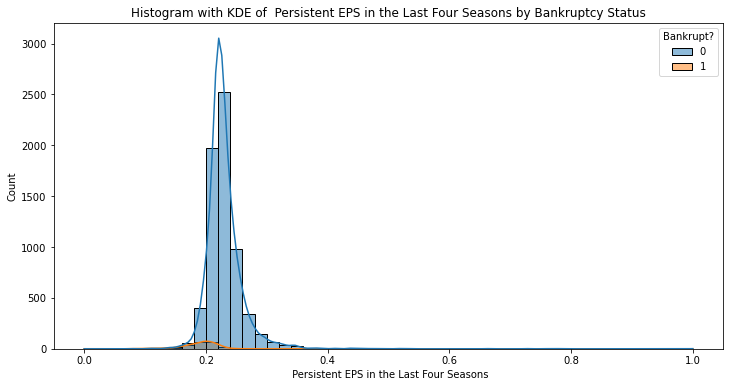

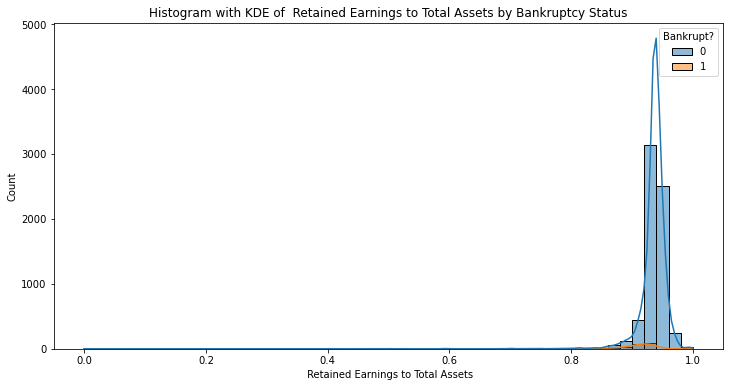

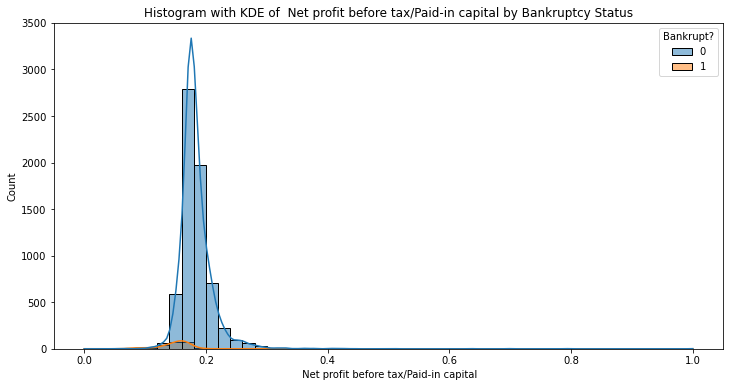

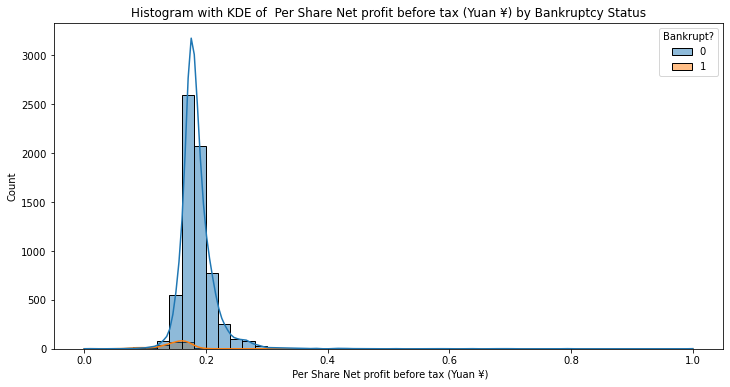

In [11]:
# Histogram


for feature in key_features:
    plt.figure(figsize=(12, 6))
    sns.histplot(df, x=feature, hue='Bankrupt?', kde=True, bins=50)
    plt.title(f'Histogram with KDE of {feature} by Bankruptcy Status')
    plt.show()

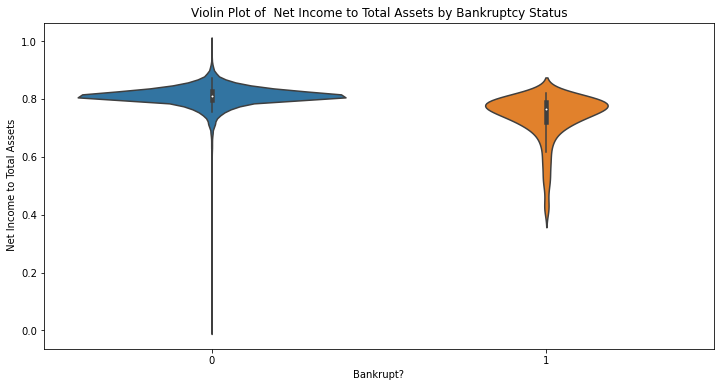

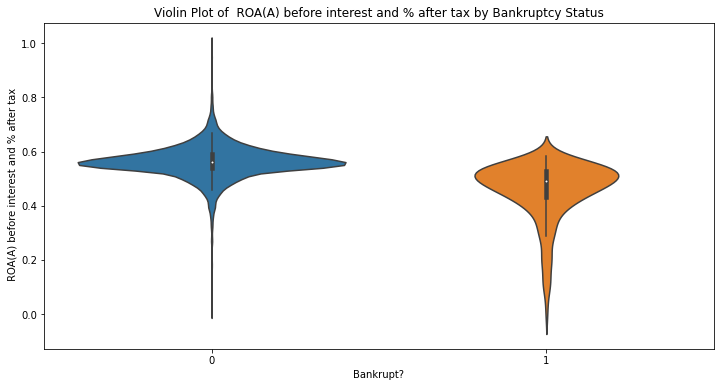

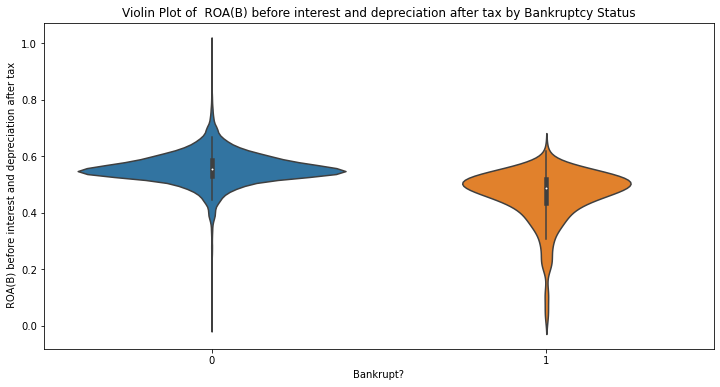

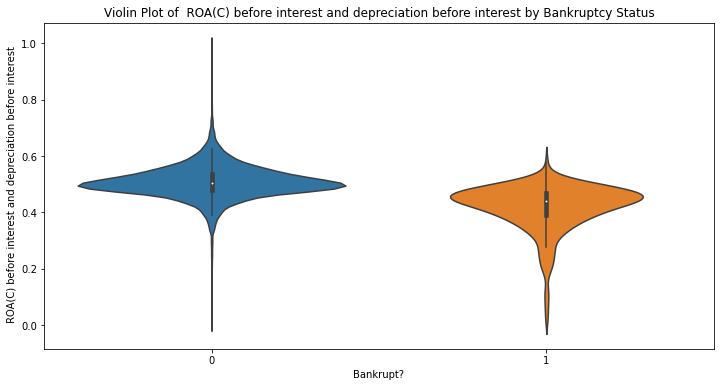

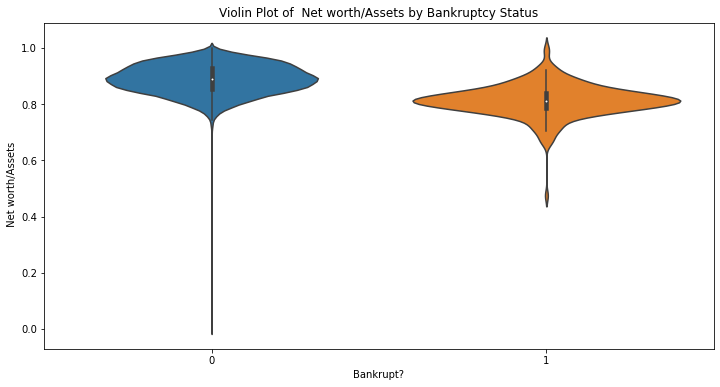

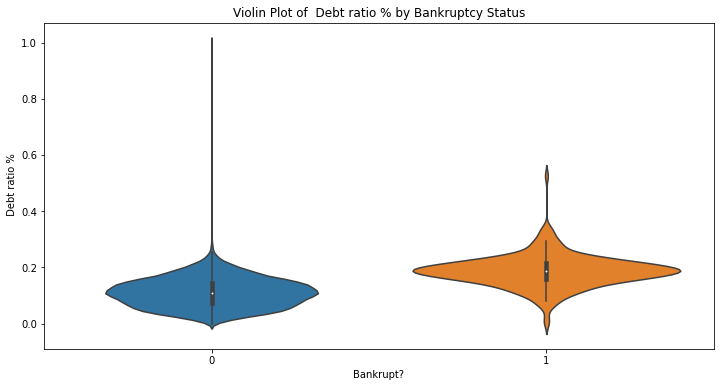

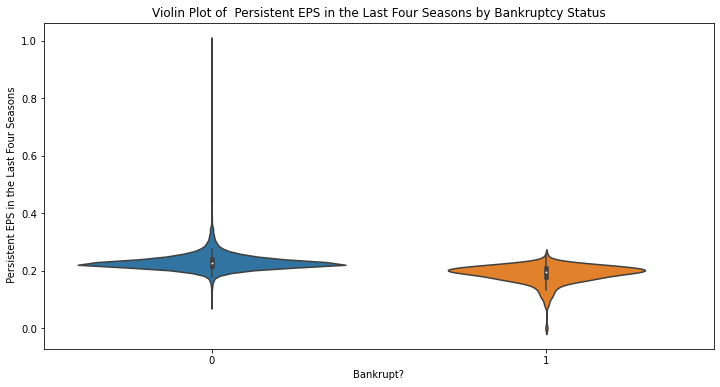

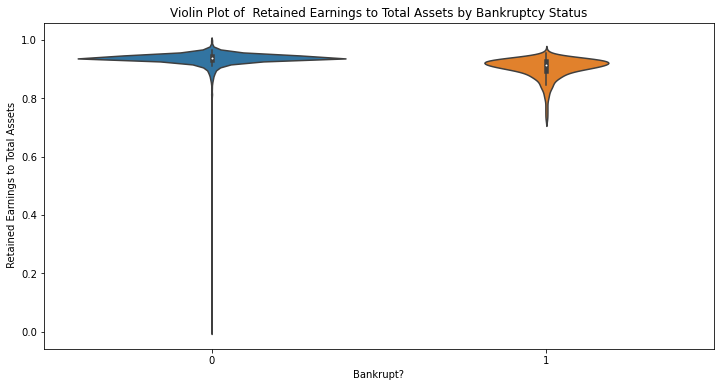

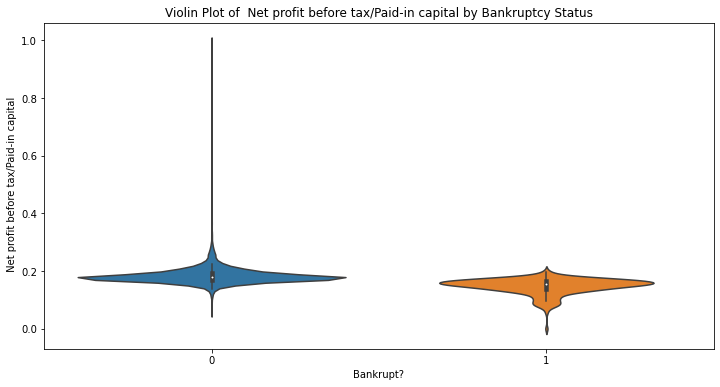

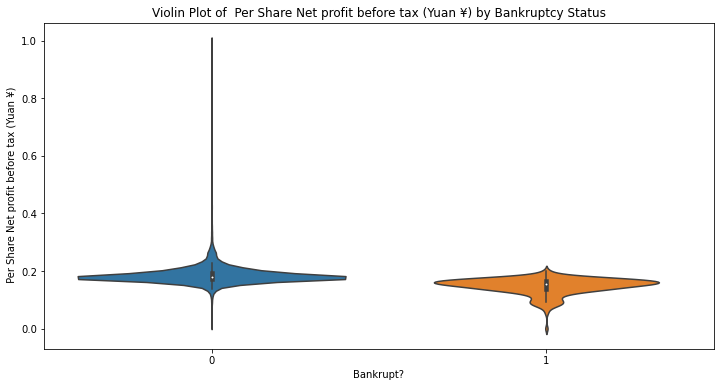

In [12]:
# Violin plot

for feature in key_features:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Bankrupt?', y=feature, data=df)
    plt.title(f'Violin Plot of {feature} by Bankruptcy Status')
    plt.show()

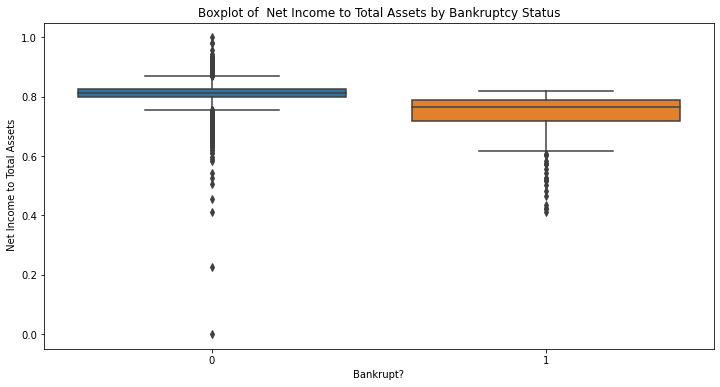

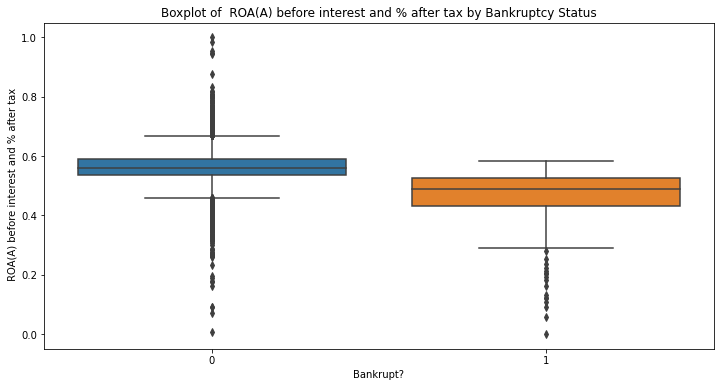

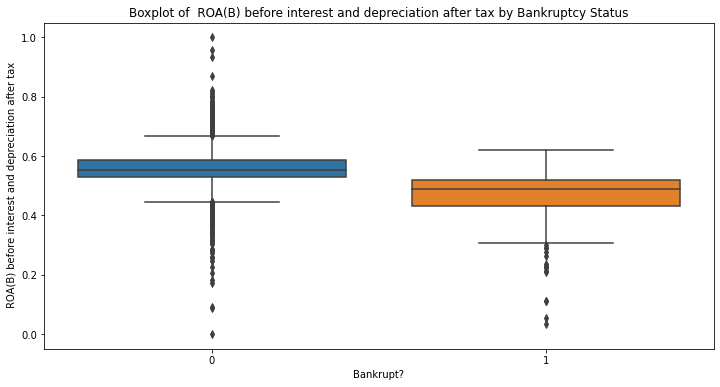

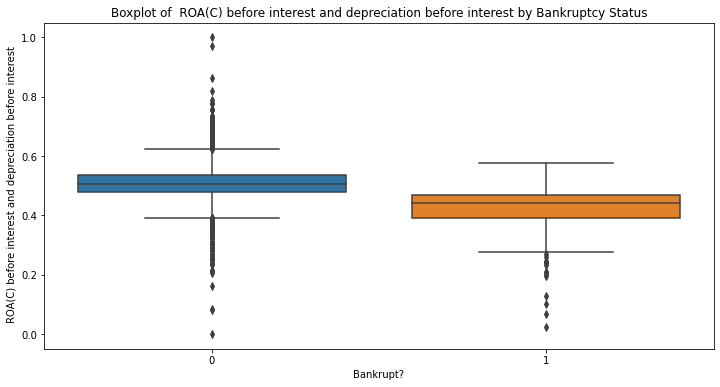

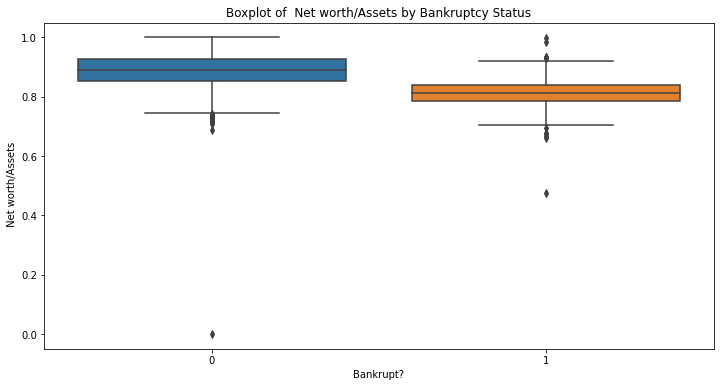

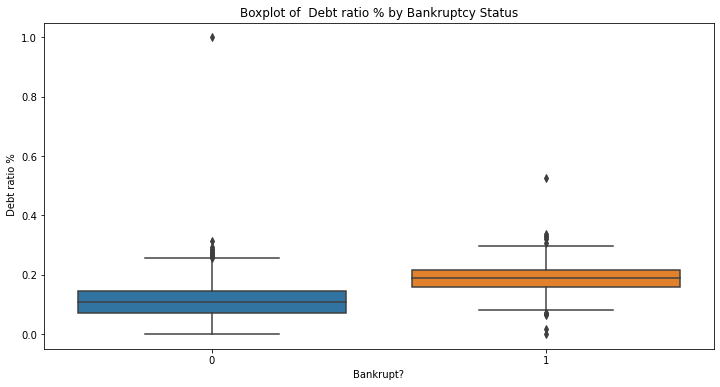

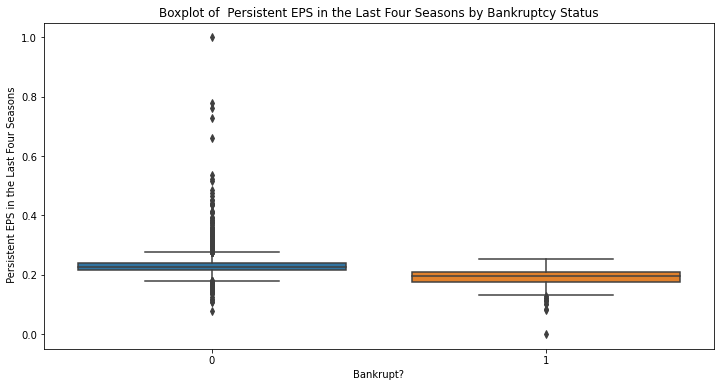

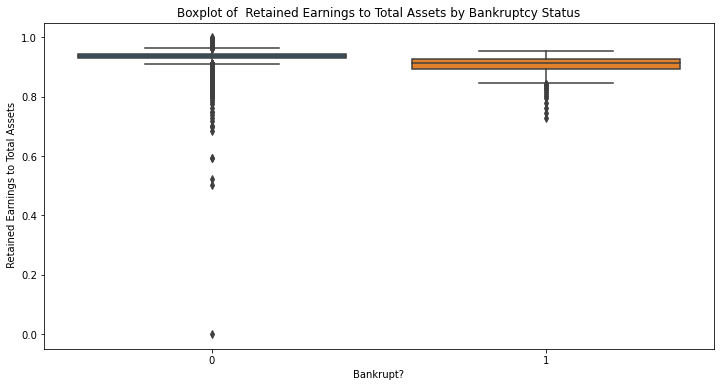

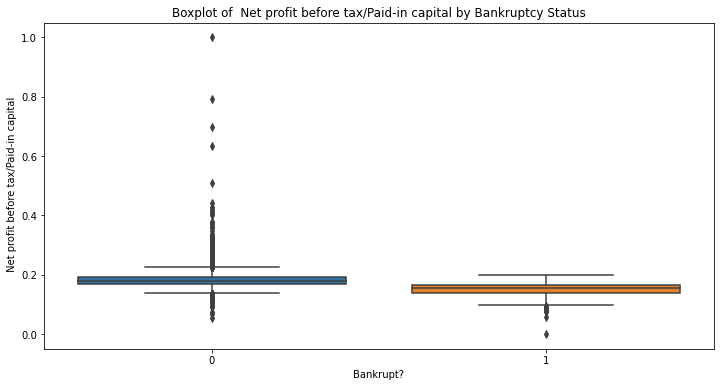

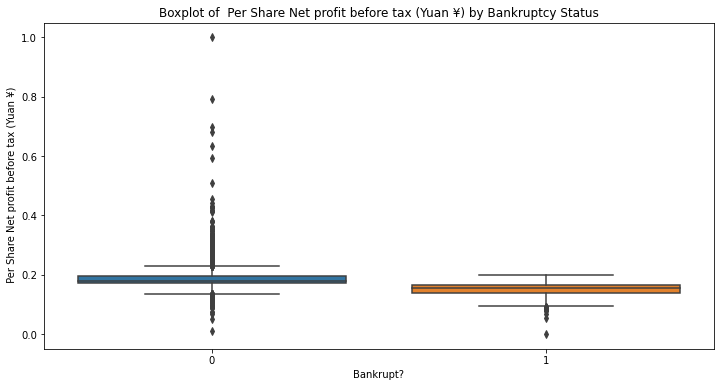

In [13]:
# Box plot

for feature in key_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Bankrupt?', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Bankruptcy Status')
    plt.show()

Since the box plot reveals too many outliers, we will try to examine them.

In [14]:
def identify_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

# Example for one feature
outliers = identify_outliers(df, key_features[0])
print(f"Outliers in {key_features[0]}:\n", outliers)

Outliers in  Net Income to Total Assets:
       Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
3             1                                           0.399844          
5             1                                           0.388680          
6             0                                           0.390923          
29            1                                           0.416126          
...         ...                                                ...          
6749          0                                           0.400331          
6751          0                                           0.624482          
6756          0                                           0.367523          
6761          0                                           0.400868          
6789          0                                           0.284941          

       ROA(A) before interest and

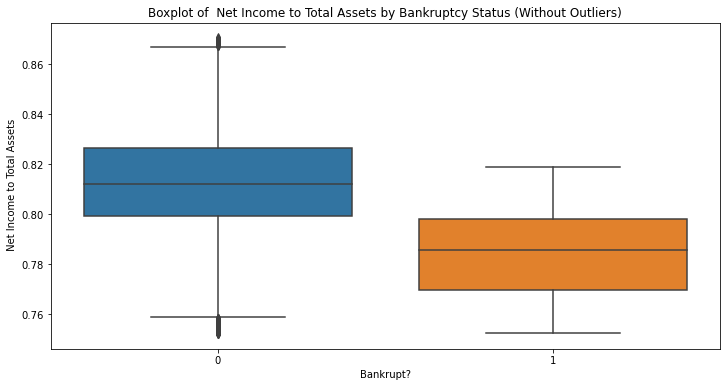

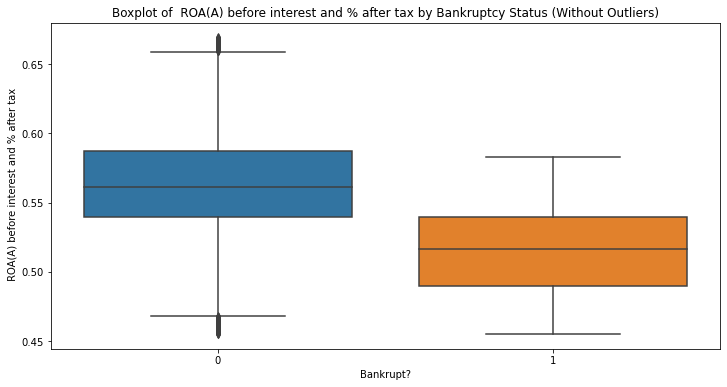

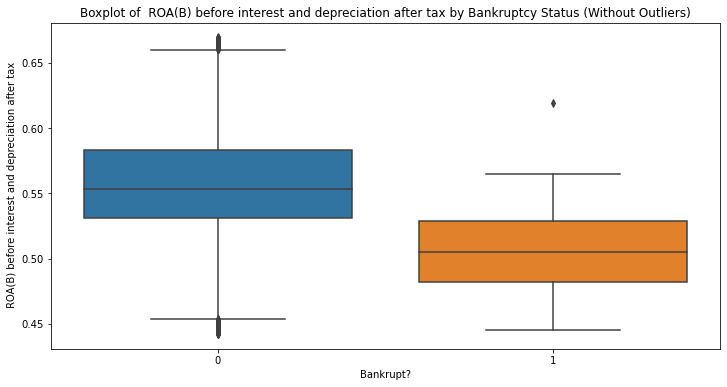

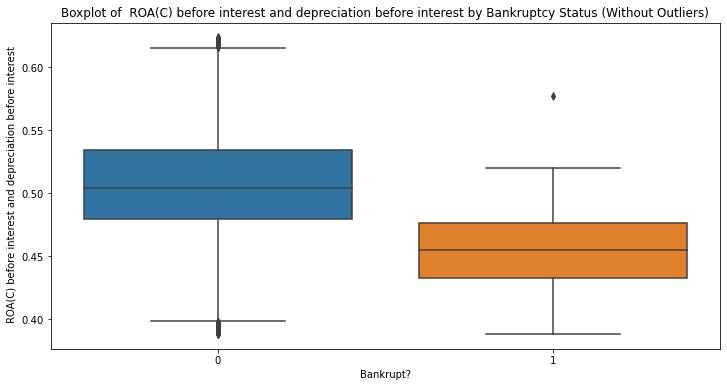

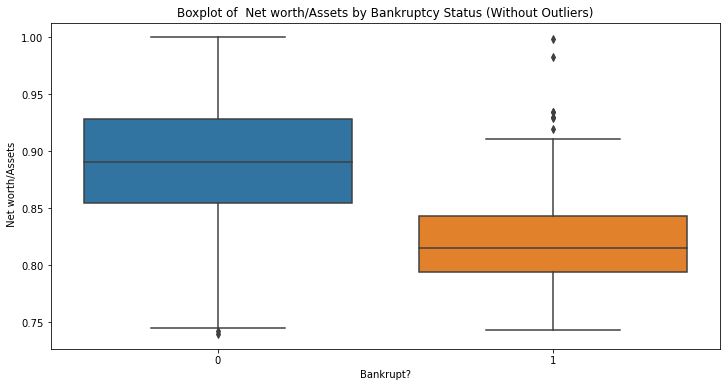

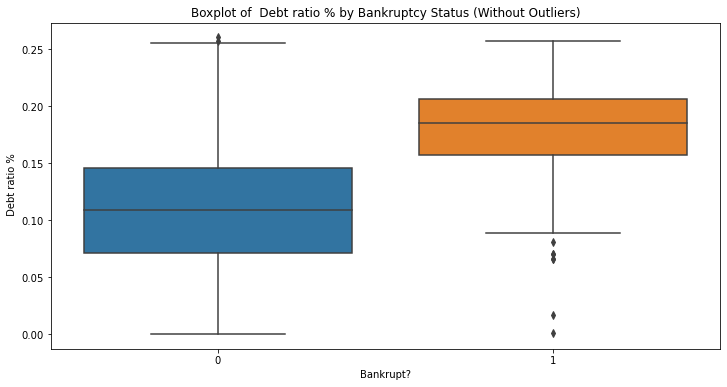

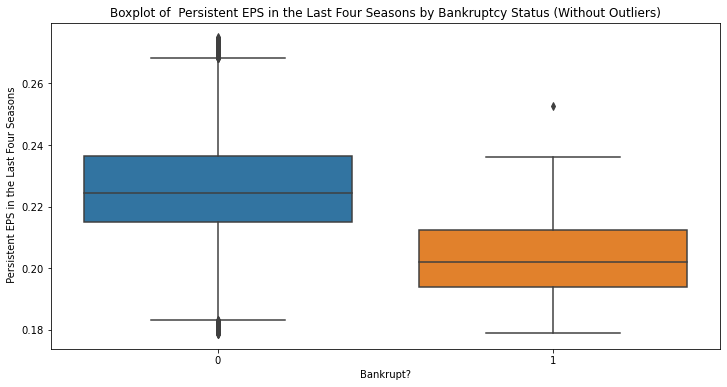

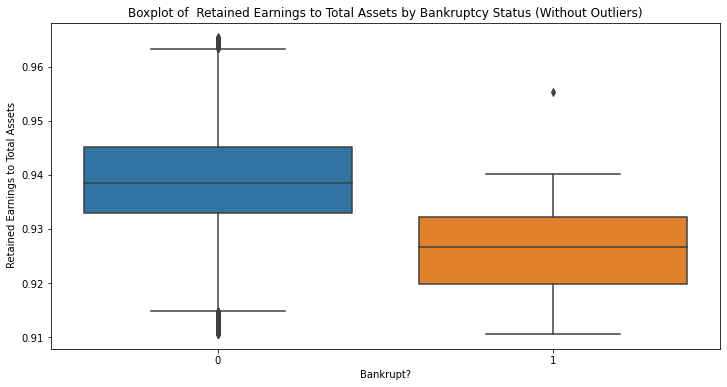

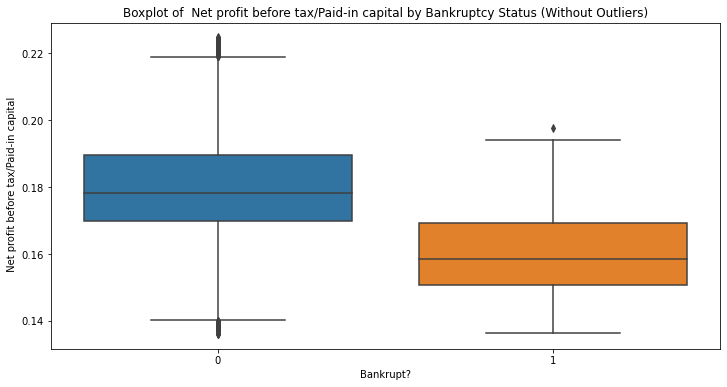

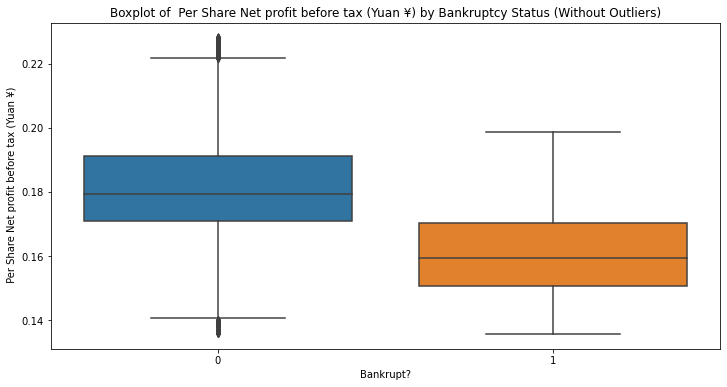

In [15]:
# Box plot after removing outliers

for feature in key_features:
    df_no_outliers = df[(df[feature] >= df[feature].quantile(0.25) - 1.5 * (df[feature].quantile(0.75) - df[feature].quantile(0.25))) & 
                        (df[feature] <= df[feature].quantile(0.75) + 1.5 * (df[feature].quantile(0.75) - df[feature].quantile(0.25)))]
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Bankrupt?', y=feature, data=df_no_outliers)
    plt.title(f'Boxplot of {feature} by Bankruptcy Status (Without Outliers)')
    plt.show()


In [16]:
# Compare the impact of outliers on the data

for feature in key_features:
    print(f"Summary statistics for {feature}:")
    print("Before removing outliers:")
    print(df[feature].describe())
    df_no_outliers = df[(df[feature] >= df[feature].quantile(0.25) - 1.5 * (df[feature].quantile(0.75) - df[feature].quantile(0.25))) & 
                        (df[feature] <= df[feature].quantile(0.75) + 1.5 * (df[feature].quantile(0.75) - df[feature].quantile(0.25)))]
    print("After removing outliers:")
    print(df_no_outliers[feature].describe())


Summary statistics for  Net Income to Total Assets:
Before removing outliers:
count    6819.000000
mean        0.807760
std         0.040332
min         0.000000
25%         0.796750
50%         0.810619
75%         0.826455
max         1.000000
Name:  Net Income to Total Assets, dtype: float64
After removing outliers:
count    6258.000000
mean        0.812012
std         0.022893
min         0.752206
25%         0.798790
50%         0.811500
75%         0.826048
max         0.870631
Name:  Net Income to Total Assets, dtype: float64
Summary statistics for  ROA(A) before interest and % after tax:
Before removing outliers:
count    6819.000000
mean        0.558625
std         0.065620
min         0.000000
25%         0.535543
50%         0.559802
75%         0.589157
max         1.000000
Name:  ROA(A) before interest and % after tax, dtype: float64
After removing outliers:
count    6258.000000
mean        0.562004
std         0.041308
min         0.455190
25%         0.538609
50%        

Some key insights from the outlier removal analysis:

1. Reduced Standard Deviation:
    The standard deviation decreased for most features after removing outliers. This suggests that the data is more tightly clustered around the mean, which can improve the stability and reliability of models trained on this data.

2. Mean Values:
    The mean values for features remained relatively stable before and after removing outliers, indicating that the central tendency of the data is not significantly affected by the removal of outliers.

3. Range of Values:
    The range of values (min and max) became narrower after removing outliers, particularly for features like "Net Income to Total Assets," "ROA(A) before interest and % after tax," and "Net profit before tax/Paid-in capital." This suggests that the outliers were indeed extreme values that may not represent the general trend in the data.

4. Insight on Features:

    o Net Income to Total Assets: The mean increased slightly, and the standard deviation decreased, indicating a more consistent measure of profitability relative to total assets.

    o ROA (Return on Assets): Similar improvements are observed, indicating a more reliable measure of profitability after removing outliers.

    o Debt Ratio %: The standard deviation decreased, indicating a more consistent measure of debt relative to total assets.
    
    o Retained Earnings to Total Assets: The feature became more consistent, with a narrower range and reduced standard deviation, suggesting a more stable measure of retained earnings relative to total assets.

# Classification Models

Since employing classification models over the dataset without outliers may or may not give the right quality of results, we will employ the models over both the original dataset and the dataset without outliers and compare the accuracy between the models.

In [2]:
# Importing necessary libraries for classification

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore")

In [12]:
# Separate features and target

y = df[['Bankrupt?']]                 # target
X = df.drop('Bankrupt?',axis=1)       # features

In [13]:
# Scaling the features using StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Models: Logistic Regression, Decision Trees, Random Forest, Support Vector Machines, XGBoost, Gaussian Naive Bayes, Gradient Boosting, Adaboost

In [15]:
# Define the models: We will use Logistic regression, Decision tree, Random forest, Support vector machines, xgBoost,
# Gaussian Naive Bayes, gradient boosting, adaboost

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': xgb.XGBClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

In [16]:
# Prepare a hyperparameter grids for each model. This way we will be able to fit the best parameters into the models without
# having to perform this task later.

param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30, 40, 50], 'criterion': ['gini', 'entropy']},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'criterion': ['gini', 'entropy']},
    'SVM': {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'XGBoost': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 6, 9]},
    'Naive Bayes': {'var_smoothing': [1e-9, 1e-8, 1e-7]}, 
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 6]},
    'AdaBoost': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1]}
}

In [17]:
# Function to calculate and store metrics

def calculate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [18]:
# Train models on the original data

original_scores = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    original_scores[name] = calculate_metrics(y_test, y_pred)

In [19]:
# Identify and remove outliers using IsolationForest

iso_forest = IsolationForest(contamination=0.1)
outliers = iso_forest.fit_predict(X_scaled)
mask = outliers != -1
X_no_outliers = X_scaled[mask]
y_no_outliers = y[mask]

In [20]:
# Split the data without outliers into training and test sets

X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

In [21]:
# Train models on the data without outliers

no_outliers_scores = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_no_outliers, y_train_no_outliers)
    best_model = grid_search.best_estimator_
    y_pred_no_outliers = best_model.predict(X_test_no_outliers)
    no_outliers_scores[name] = calculate_metrics(y_test_no_outliers, y_pred_no_outliers)

In [22]:
# Create a DataFrame to compare the scores

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
data = []

for name in models.keys():
    original = original_scores[name]
    no_outliers = no_outliers_scores[name]
    data.append([name, *original, *no_outliers])

columns = ['Model'] + [f'Original {metric}' for metric in metrics] + [f'No Outliers {metric}' for metric in metrics]
scores_df = pd.DataFrame(data, columns=columns)

# Display the scores DataFrame
scores_df

,Model,Original Accuracy,Original Precision,Original Recall,Original F1-Score,No Outliers Accuracy,No Outliers Precision,No Outliers Recall,No Outliers F1-Score
0,Logistic Regression,0.966276,0.727273,0.156863,0.258065,0.971498,0.500000,0.085714,0.146341
1,Decision Tree,0.956745,0.416667,0.392157,0.404040,0.973127,0.562500,0.257143,0.352941
2,Random Forest,0.965543,0.700000,0.137255,0.229508,0.972313,0.666667,0.057143,0.105263
3,SVM,0.964809,1.000000,0.058824,0.111111,0.971498,0.000000,0.000000,0.000000
4,XGBoost,0.966276,0.619048,0.254902,0.361111,0.972313,0.666667,0.057143,0.105263
5,Naive Bayes,0.230938,0.043040,0.921569,0.082240,0.388436,0.041026,0.914286,0.078528
6,Gradient Boosting,0.965543,1.000000,0.078431,0.145455,0.973127,0.666667,0.114286,0.195122
7,AdaBoost,0.966276,0.777778,0.137255,0.233333,0.971498,0.000000,0.000000,0.000000


Best Model:

o Accuracy: Most models show high accuracy (above 0.95) for both original and no outliers data.

o Precision and Recall: No single model stands out significantly; however, models like Decision Tree and Gradient Boosting show relatively balanced performance between Precision and Recall.

o F1-Score: F1-Score is crucial when you have an imbalance between Precision and Recall. XGBoost and Decision Tree without outliers show better F1-scores compared to other models.

Conclusion:

o Based on the metrics, XGBoost and Gradient Boosting without outliers seem to perform better overall.

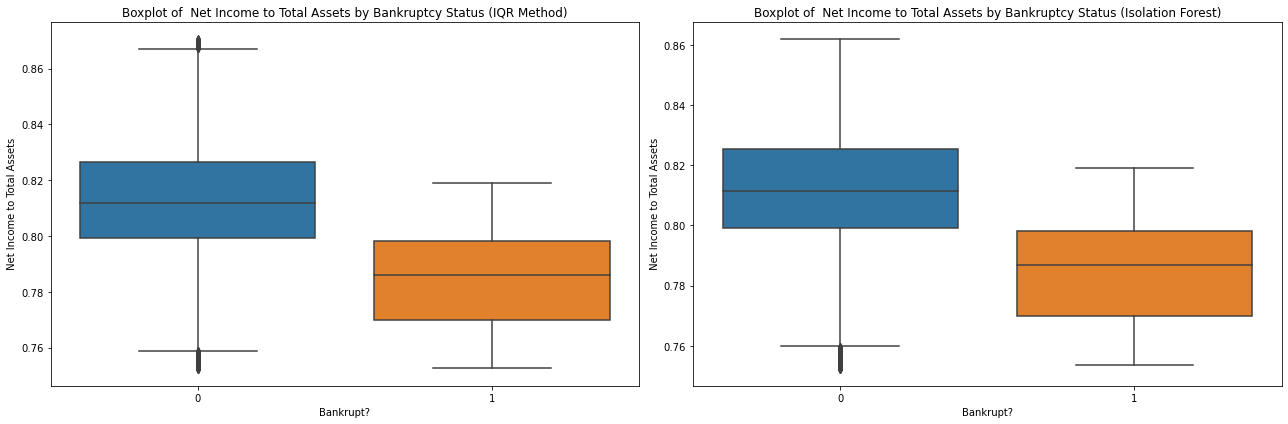

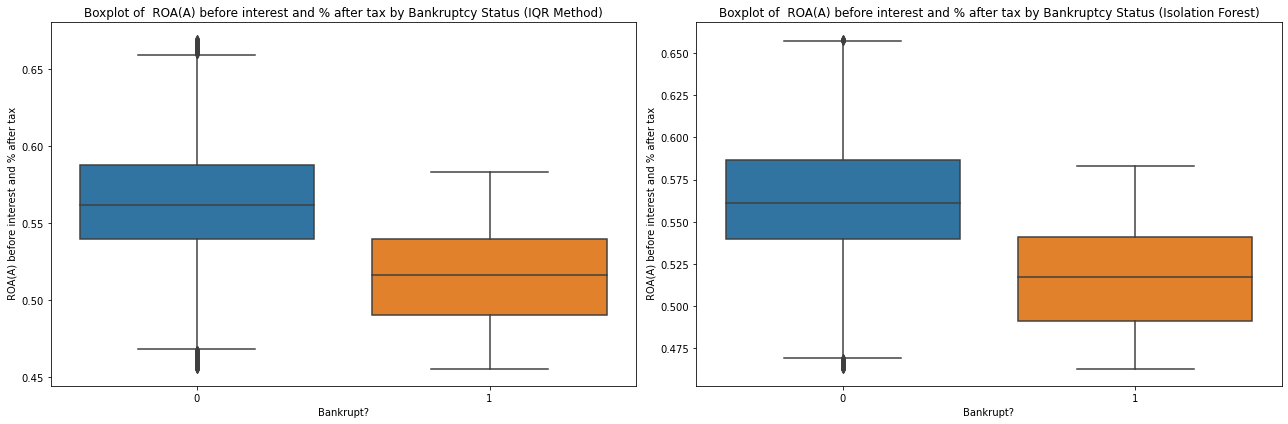

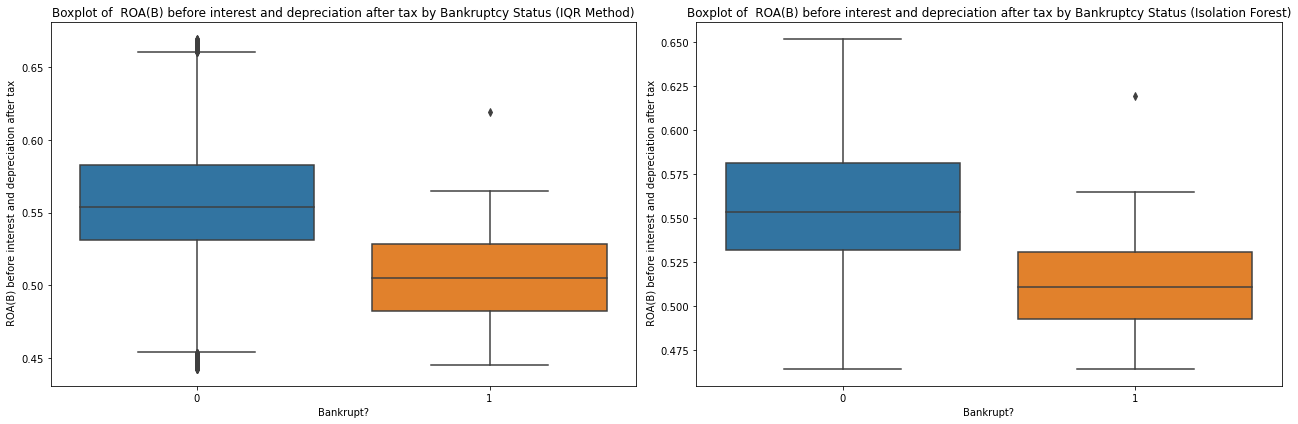

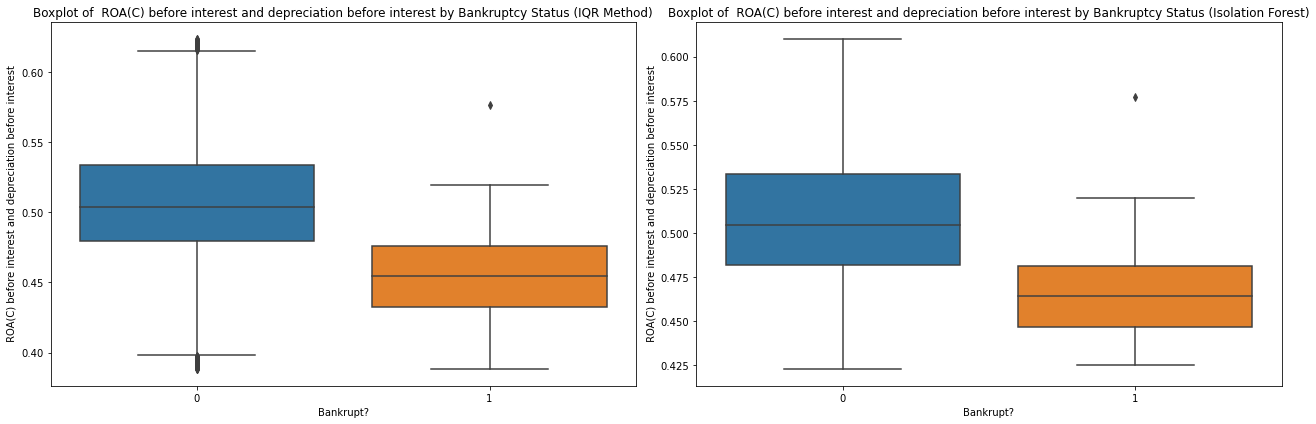

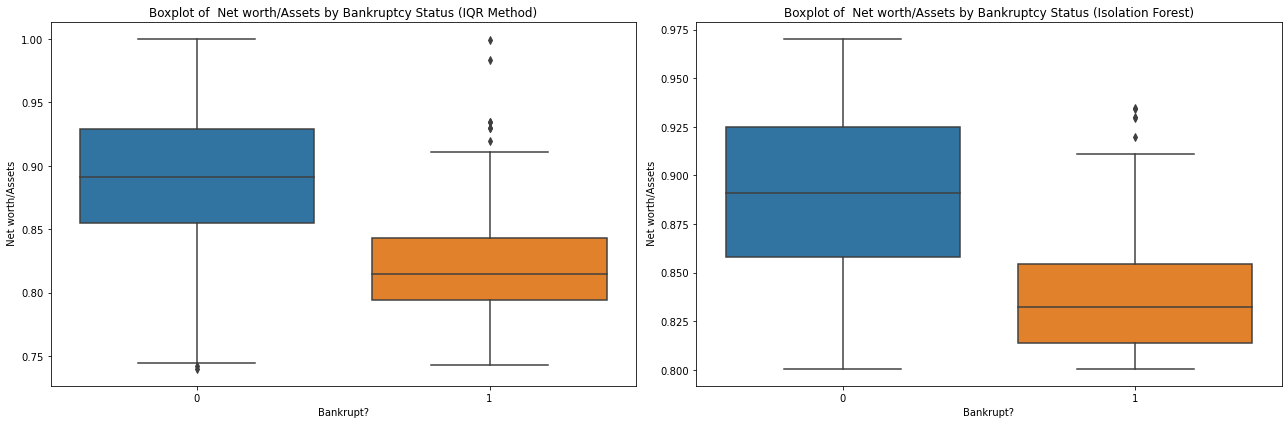

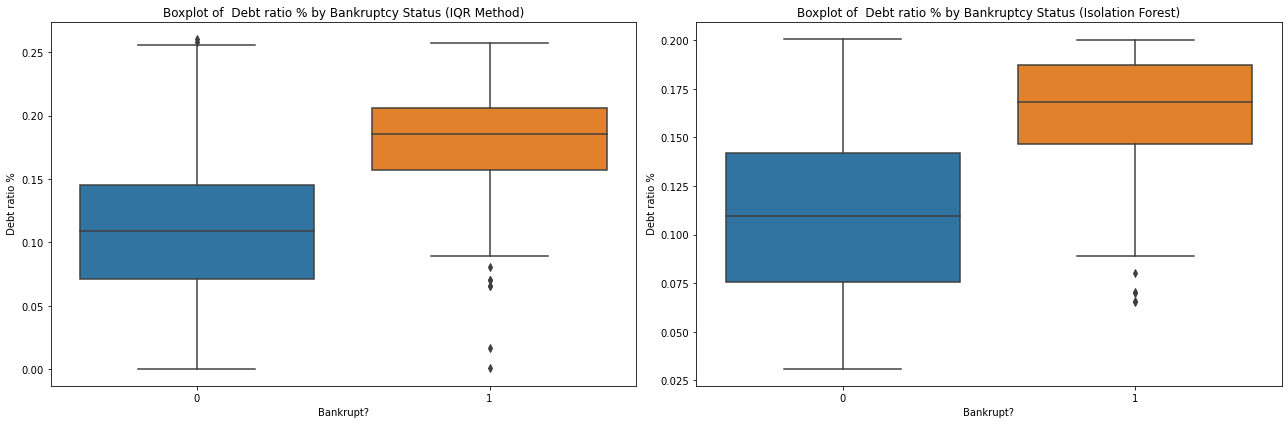

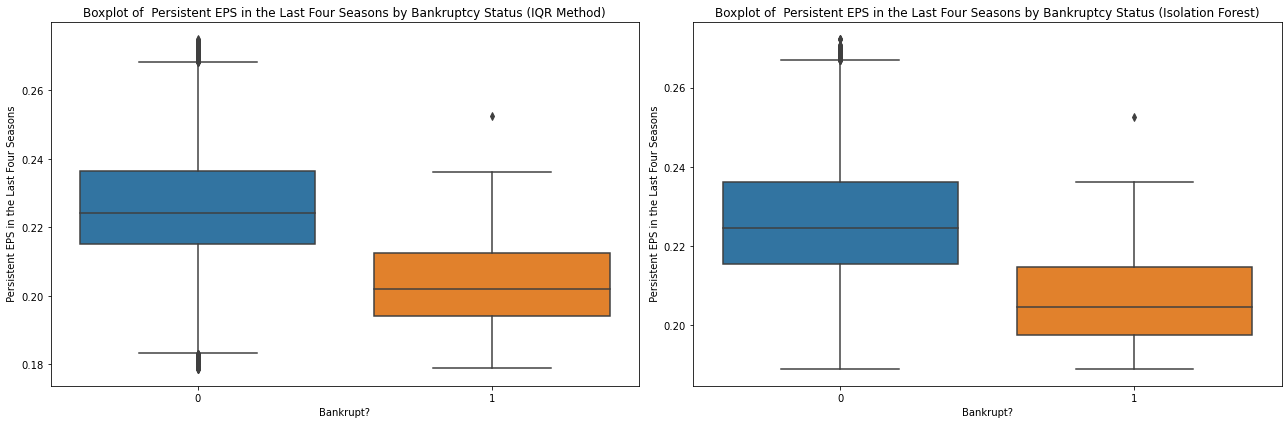

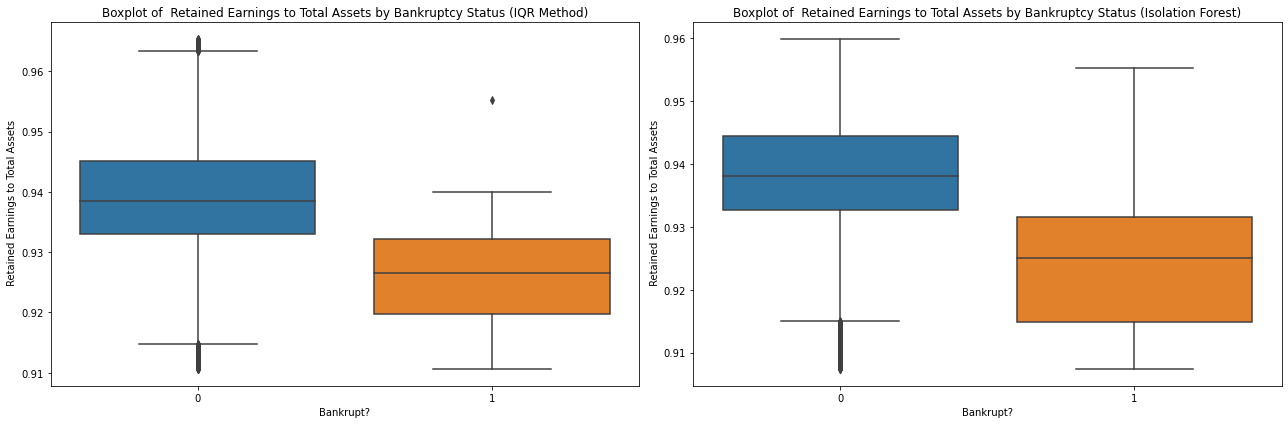

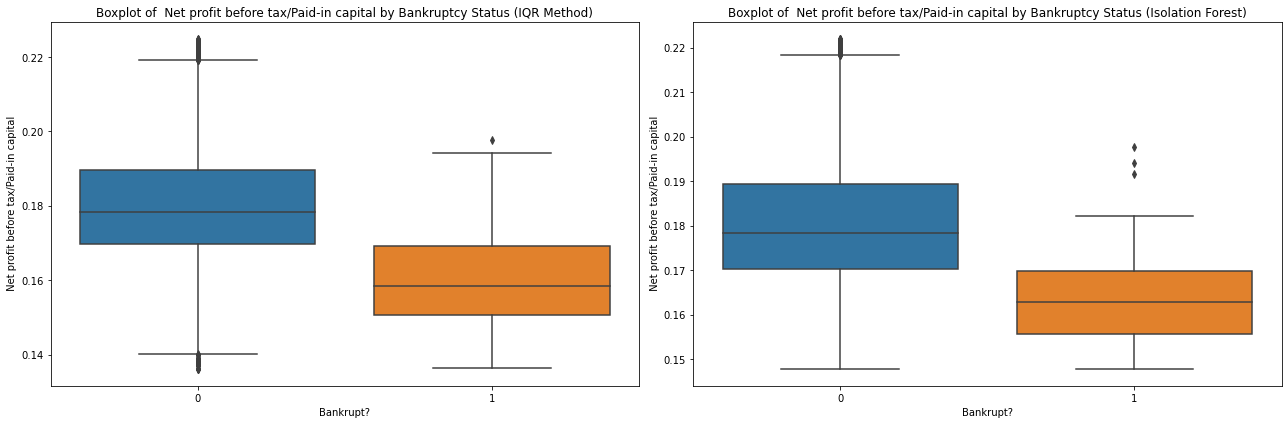

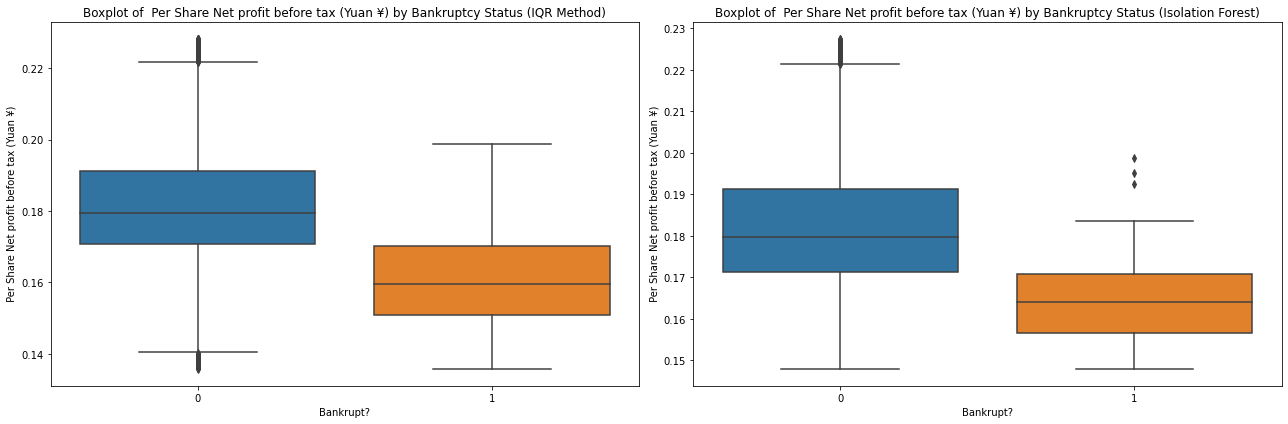

In [10]:
# Loop through each feature and plot boxplot side by side for IQR and Isolation Forest methods

for feature in key_features:
    # IQR Method
    df_no_outliers_iqr = df[(df[feature] >= df[feature].quantile(0.25) - 1.5 * (df[feature].quantile(0.75) - df[feature].quantile(0.25))) & 
                            (df[feature] <= df[feature].quantile(0.75) + 1.5 * (df[feature].quantile(0.75) - df[feature].quantile(0.25)))]
    
    # Isolation Forest Method
    iso_forest = IsolationForest(contamination=0.1)
    outliers = iso_forest.fit_predict(df[[feature]])
    mask = outliers != -1
    df_no_outliers_if = df[mask]
    
    # Plotting side by side
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    
    sns.boxplot(x='Bankrupt?', y=feature, data=df_no_outliers_iqr, ax=axes[0])
    axes[0].set_title(f'Boxplot of {feature} by Bankruptcy Status (IQR Method)')
    
    sns.boxplot(x='Bankrupt?', y=feature, data=df_no_outliers_if, ax=axes[1])
    axes[1].set_title(f'Boxplot of {feature} by Bankruptcy Status (Isolation Forest)')
    
    plt.tight_layout()
    plt.show()

## Perform classification models over limited features

In [3]:
# Extract top 20 features and make a dataset having only top 20 features and target

df = pd.read_csv('Bankruptcy.csv')

In [4]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation values with the target variable 'Bankruptcy?'
target_corr = correlation_matrix['Bankrupt?'].abs()

# Sort the correlation values in descending order and select the top 10 features
top_features = target_corr.sort_values(ascending=False).head(11)  # 20 features + 1 target itself

# Drop the target from the list
top_features = top_features.drop('Bankrupt?')

# Get the list of top 10 feature names
top_feature_names = top_features.index.tolist()

# Create a new DataFrame with only the top 10 features and the target variable
df_top_features = df[top_feature_names + ['Bankrupt?']]

# Now df_top_features contains only the top 10 features and the target variable
df_top_features

,Net Income to Total Assets,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,ROA(C) before interest and depreciation before interest,Net worth/Assets,Debt ratio %,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Net profit before tax/Paid-in capital,Per Share Net profit before tax (Yuan ¥),Bankrupt?
0,0.716845,0.424389,0.405750,0.370594,0.792424,0.207576,0.169141,0.903225,0.137757,0.138736,1
1,0.795297,0.538214,0.516730,0.464291,0.828824,0.171176,0.208944,0.931065,0.168962,0.169918,1
2,0.774670,0.499019,0.472295,0.426071,0.792484,0.207516,0.180581,0.909903,0.148036,0.142803,1
3,0.739555,0.451265,0.457733,0.399844,0.848535,0.151465,0.193722,0.906902,0.147561,0.148603,1
4,0.795016,0.538432,0.522298,0.465022,0.893491,0.106509,0.212537,0.913850,0.167461,0.168412,1
...,...,...,...,...,...,...,...,...,...,...,...
6814,0.799927,0.539468,0.543230,0.493687,0.875382,0.124618,0.216602,0.925611,0.171111,0.172102,0
6815,0.799748,0.538269,0.524172,0.475162,0.900747,0.099253,0.216697,0.932629,0.171805,0.172780,0
6816,0.797778,0.533744,0.520638,0.472725,0.961061,0.038939,0.210929,0.932000,0.172287,0.173232,0
6817,0.811808,0.559911,0.554045,0.506264,0.913021,0.086979,0.228326,0.939613,0.182498,0.185584,0


In [5]:
df_top_features.to_csv('bank_new.csv', index = False)

In [26]:
# Separate features and target

y = df_top_features[['Bankrupt?']]                 # target
X = df_top_features.drop('Bankrupt?',axis=1)       # features

In [27]:
# Scaling the features using StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
# Train models on the original data

original_scores = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    original_scores[name] = calculate_metrics(y_test, y_pred)

In [30]:
# Identify and remove outliers using IsolationForest

iso_forest = IsolationForest(contamination=0.1)
outliers = iso_forest.fit_predict(X_scaled)
mask = outliers != -1
X_no_outliers = X_scaled[mask]
y_no_outliers = y[mask]

In [31]:
# Split the data without outliers into training and test sets

X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

In [32]:
# Train models on the data without outliers

no_outliers_scores = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_no_outliers, y_train_no_outliers)
    best_model = grid_search.best_estimator_
    y_pred_no_outliers = best_model.predict(X_test_no_outliers)
    no_outliers_scores[name] = calculate_metrics(y_test_no_outliers, y_pred_no_outliers)

In [33]:
# Create a DataFrame to compare the scores

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
data = []

for name in models.keys():
    original = original_scores[name]
    no_outliers = no_outliers_scores[name]
    data.append([name, *original, *no_outliers])

columns = ['Model'] + [f'Original {metric}' for metric in metrics] + [f'No Outliers {metric}' for metric in metrics]
scores_df = pd.DataFrame(data, columns=columns)

# Display the scores DataFrame
scores_df

,Model,Original Accuracy,Original Precision,Original Recall,Original F1-Score,No Outliers Accuracy,No Outliers Precision,No Outliers Recall,No Outliers F1-Score
0,Logistic Regression,0.967742,0.818182,0.176471,0.290323,0.978827,0.000000,0.000000,0.000000
1,Decision Tree,0.950147,0.302326,0.254902,0.276596,0.960098,0.103448,0.115385,0.109091
2,Random Forest,0.965543,0.642857,0.176471,0.276923,0.978827,0.000000,0.000000,0.000000
3,SVM,0.962610,0.000000,0.000000,0.000000,0.978827,0.000000,0.000000,0.000000
4,XGBoost,0.967009,0.687500,0.215686,0.328358,0.978827,0.000000,0.000000,0.000000
5,Naive Bayes,0.945748,0.342466,0.490196,0.403226,0.840391,0.102804,0.846154,0.183333
6,Gradient Boosting,0.963343,0.571429,0.078431,0.137931,0.978827,0.000000,0.000000,0.000000
7,AdaBoost,0.964076,0.666667,0.078431,0.140351,0.978827,0.000000,0.000000,0.000000


    Contamination Rate                Model  Accuracy  Precision    Recall  \
0                 0.01  Logistic Regression  0.970370   0.600000  0.209302   
1                 0.01        Decision Tree  0.955556   0.292683  0.279070   
2                 0.01        Random Forest  0.968889   0.538462  0.162791   
3                 0.01                  SVM  0.968148   0.000000  0.000000   
4                 0.01              XGBoost  0.969630   0.583333  0.162791   
5                 0.01          Naive Bayes  0.910370   0.236486  0.813953   
6                 0.01    Gradient Boosting  0.968148   0.000000  0.000000   
7                 0.01             AdaBoost  0.968148   0.000000  0.000000   
8                 0.05  Logistic Regression  0.983796   0.000000  0.000000   
9                 0.05        Decision Tree  0.969907   0.166667  0.263158   
10                0.05        Random Forest  0.984568   0.333333  0.052632   
11                0.05                  SVM  0.985340   0.000000

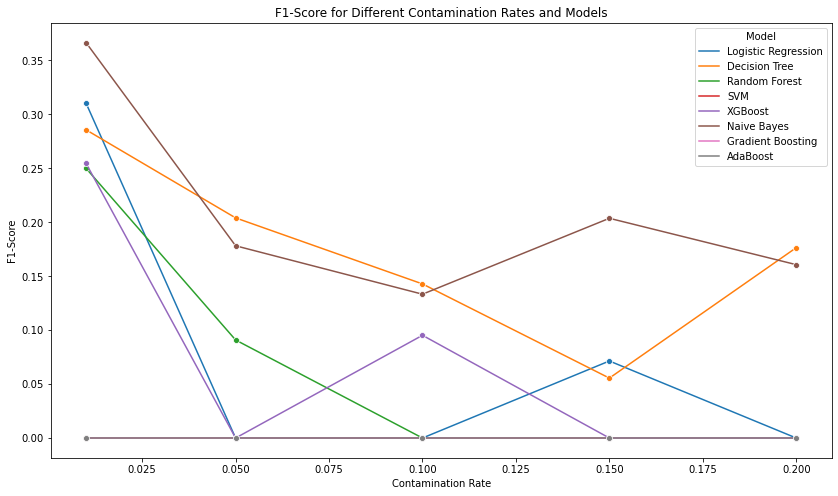

In [34]:
# Function to evaluate contamination rates
def evaluate_contamination_rates(X, y, models, param_grids, contamination_rates):
    results = []

    for rate in contamination_rates:
        iso_forest = IsolationForest(contamination=rate)
        outliers = iso_forest.fit_predict(X)
        mask = outliers != -1
        X_no_outliers = X[mask]
        y_no_outliers = y[mask]

        # Split the data without outliers
        X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
            X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

        # Train and evaluate models
        for name, model in models.items():
            grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
            grid_search.fit(X_train_no_outliers, y_train_no_outliers)
            best_model = grid_search.best_estimator_
            y_pred_no_outliers = best_model.predict(X_test_no_outliers)

            accuracy = accuracy_score(y_test_no_outliers, y_pred_no_outliers)
            precision = precision_score(y_test_no_outliers, y_pred_no_outliers, pos_label=1)
            recall = recall_score(y_test_no_outliers, y_pred_no_outliers, pos_label=1)
            f1 = f1_score(y_test_no_outliers, y_pred_no_outliers, pos_label=1)

            results.append({
                'Contamination Rate': rate,
                'Model': name,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1
            })

    return pd.DataFrame(results)

# Define your models and parameter grids
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': xgb.XGBClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30, 40, 50], 'criterion': ['gini', 'entropy']},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'criterion': ['gini', 'entropy']},
    'SVM': {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'XGBoost': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 6, 9]},
    'Naive Bayes': {'var_smoothing': [1e-9, 1e-8, 1e-7]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 6]},
    'AdaBoost': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1]}
}

# Define contamination rates to try
contamination_rates = [0.01, 0.05, 0.1, 0.15, 0.2]

# Evaluate contamination rates
results_df = evaluate_contamination_rates(X_scaled, y, models, param_grids, contamination_rates)

# Display results
print(results_df)

# You can also visualize the results to better understand the impact of different contamination rates
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.lineplot(data=results_df, x='Contamination Rate', y='F1-Score', hue='Model', marker='o')
plt.title('F1-Score for Different Contamination Rates and Models')
plt.show()

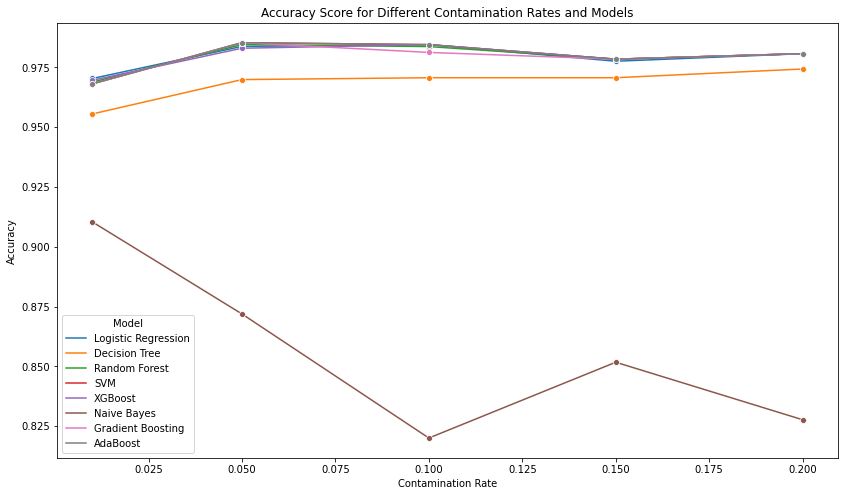

In [35]:
# Plots for different evaluation metrics on different contamination rates

plt.figure(figsize=(14, 8))
sns.lineplot(data=results_df, x='Contamination Rate', y='Accuracy', hue='Model', marker='o')
plt.title('Accuracy Score for Different Contamination Rates and Models')
plt.show()

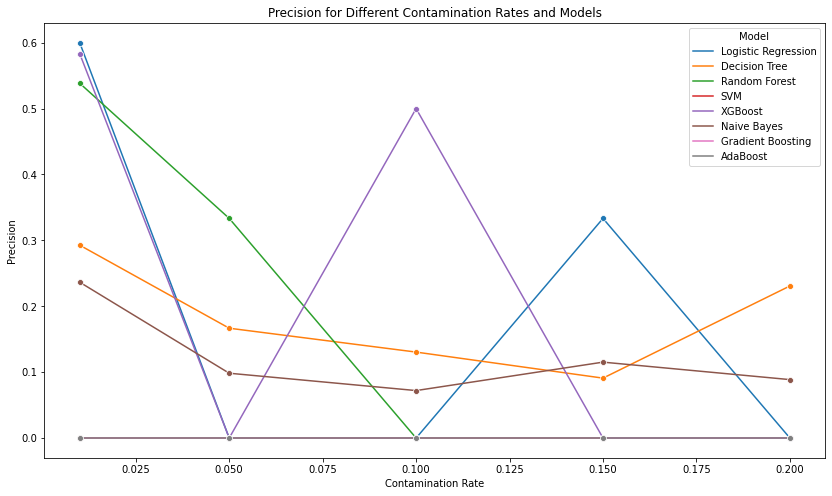

In [36]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=results_df, x='Contamination Rate', y='Precision', hue='Model', marker='o')
plt.title('Precision for Different Contamination Rates and Models')
plt.show()

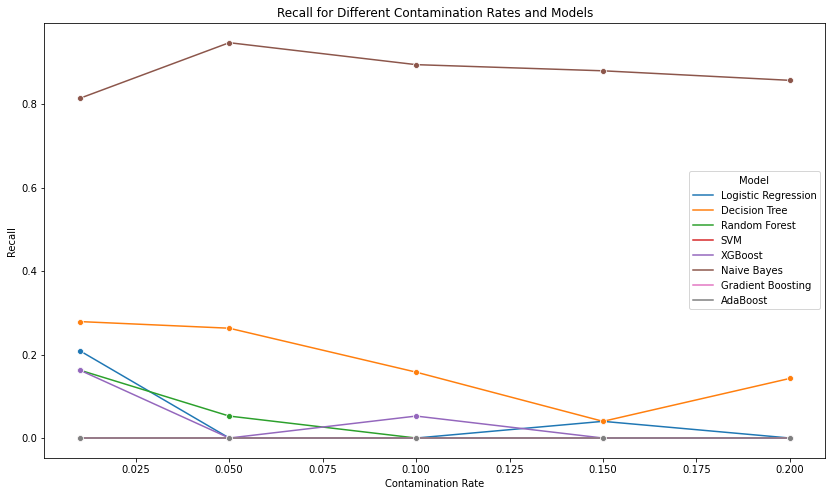

In [37]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=results_df, x='Contamination Rate', y='Recall', hue='Model', marker='o')
plt.title('Recall for Different Contamination Rates and Models')
plt.show()

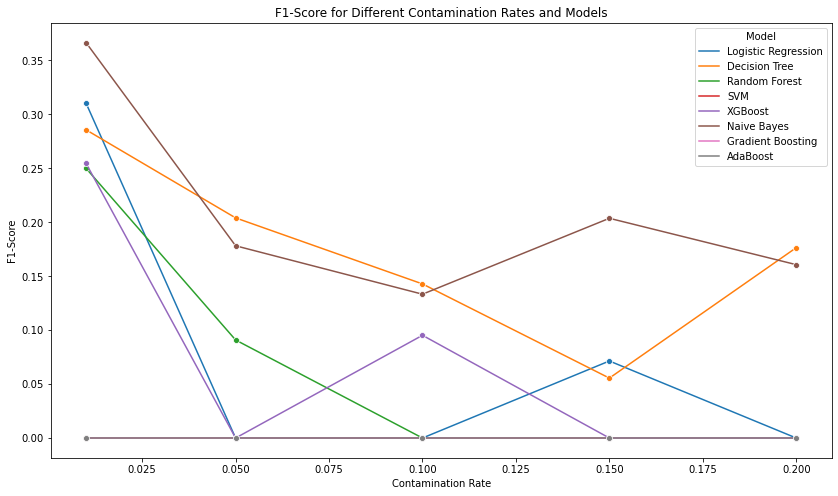

In [38]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=results_df, x='Contamination Rate', y='F1-Score', hue='Model', marker='o')
plt.title('F1-Score for Different Contamination Rates and Models')
plt.show()